In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)


2.20.0


In [2]:
df = pd.read_csv("train.csv")
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df.isna().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df["price_range"].value_counts().sort_index()


price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
df.corr()["price_range"].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [13]:
X = df.drop("price_range", axis=1)
y = df["price_range"]
X.shape, y.shape


((2000, 20), (2000,))

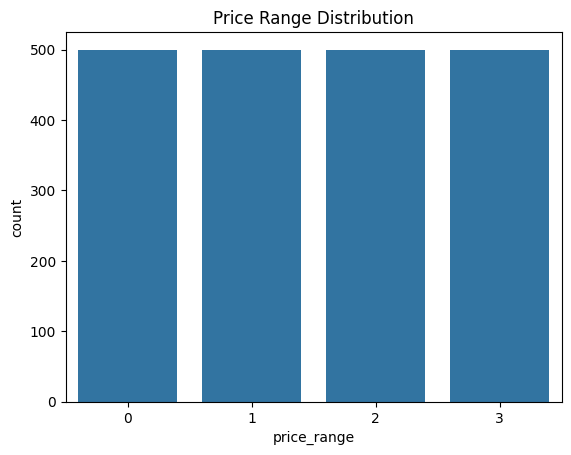

In [14]:
sns.countplot(x=y)
plt.title("Price Range Distribution")
plt.show()


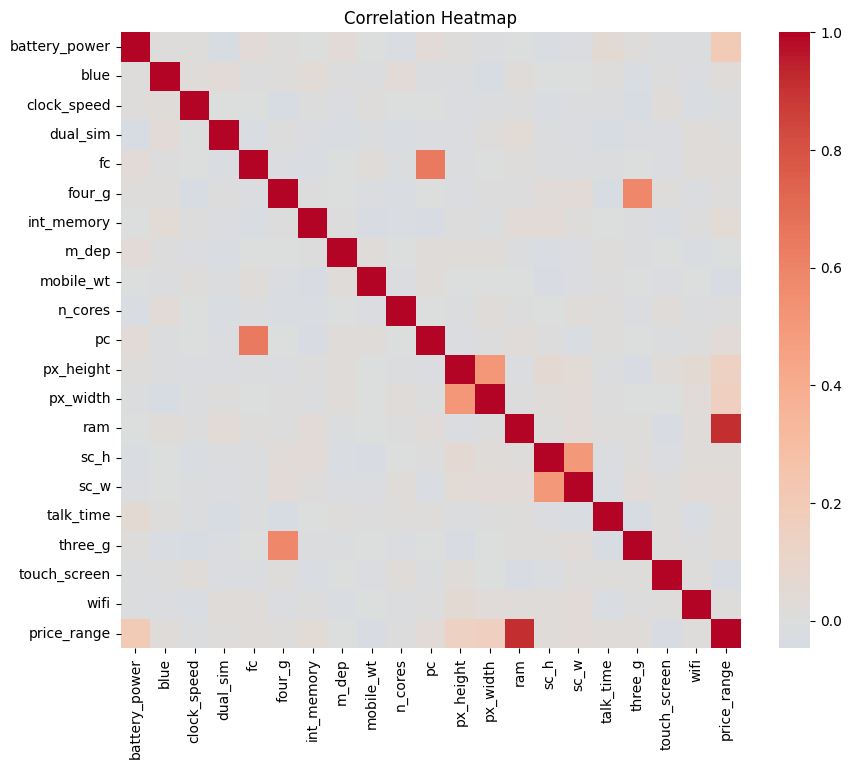

In [15]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


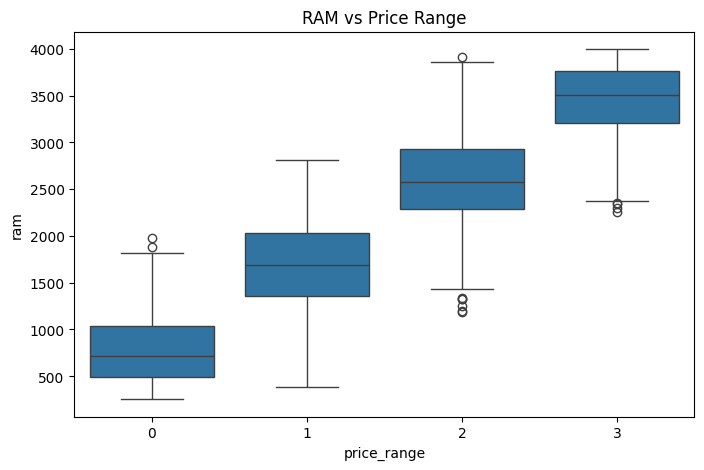

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="price_range", y="ram", data=df)
plt.title("RAM vs Price Range")
plt.show()


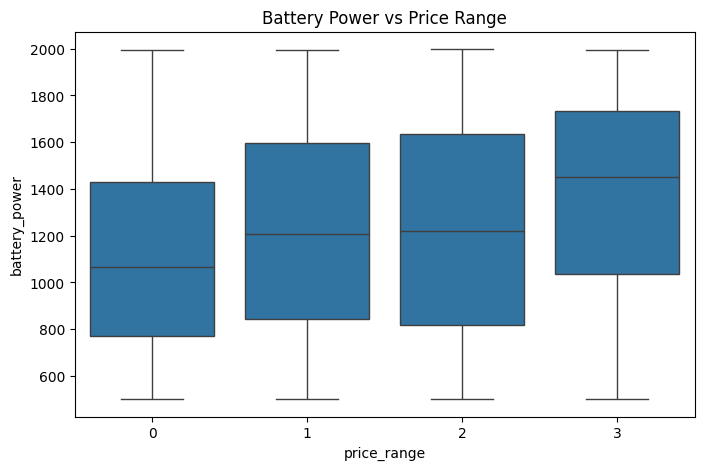

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="price_range", y="battery_power", data=df)
plt.title("Battery Power vs Price Range")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 20), (400, 20), (1600,), (400,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0.5, 1.0, 'Feature Correlation Heatmap')

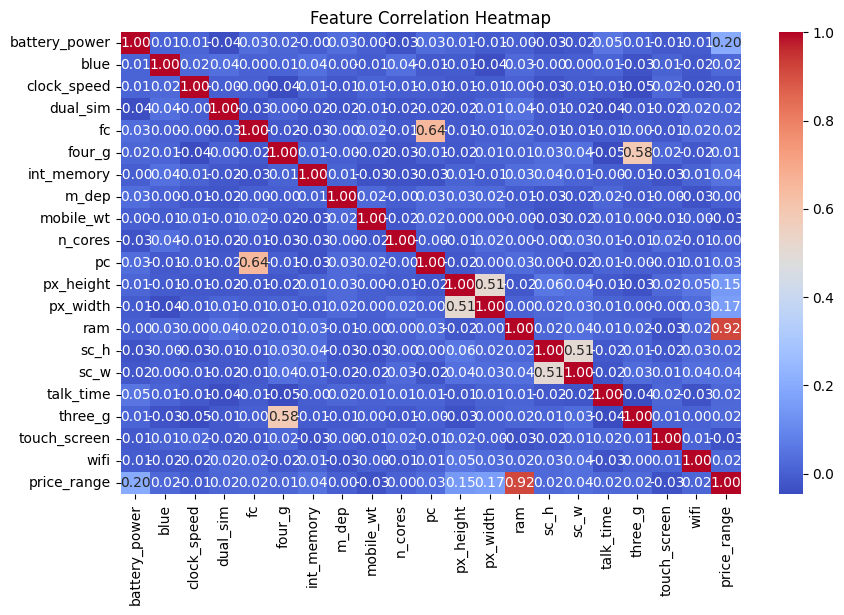

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")    

In [21]:
X_train_scaled[:5]


array([[ 1.38919326,  1.011314  , -1.25918898,  0.98634324,  1.30925256,
        -1.03693152,  1.58482903, -0.70458975, -1.25033529, -1.5516371 ,
         0.35023908, -0.79884868, -1.28564151, -0.36302366, -0.78128983,
        -0.17762722, -0.89664506, -1.78870765, -1.00878862, -1.02532046],
       [ 0.07840603,  1.011314  , -1.25918898, -1.01384584,  1.77045998,
        -1.03693152, -0.00345726, -1.39684863, -0.76837395,  1.0731587 ,
         0.84454887,  1.58230174,  1.63767503, -1.54789561,  0.64708236,
         1.87520744,  0.56094407, -1.78870765, -1.00878862,  0.97530483],
       [-1.02457347, -0.98881258,  1.18747125,  0.98634324, -0.0743697 ,
         0.96438384,  1.36575506,  1.37218691, -1.39208862,  1.51062466,
         0.35023908, -1.36150237, -0.19930538,  1.69898521, -0.06710374,
         0.506651  , -0.89664506,  0.55906285,  0.99128795,  0.97530483],
       [ 0.38669222, -0.98881258, -1.25918898,  0.98634324, -0.53557712,
         0.96438384,  0.10607972,  1.02605747, -

In [22]:
X_train_scaled.shape, X_test_scaled.shape


((1600, 20), (400, 20))

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = X_train_scaled.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(4, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [25]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3719 - loss: 1.3397 - val_accuracy: 0.4563 - val_loss: 1.2633
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5359 - loss: 1.1302 - val_accuracy: 0.5437 - val_loss: 1.0750
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.9108 - val_accuracy: 0.6375 - val_loss: 0.8620
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.7159 - val_accuracy: 0.6875 - val_loss: 0.7019
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.5733 - val_accuracy: 0.7844 - val_loss: 0.5715
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.4682 - val_accuracy: 0.8250 - val_loss: 0.4908
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9078 - loss: 0.3916 - val_accuracy: 0.8687 - val_loss: 0.4164
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9297 - loss: 0.3292 - val_accuracy: 0.8687 - val_loss:

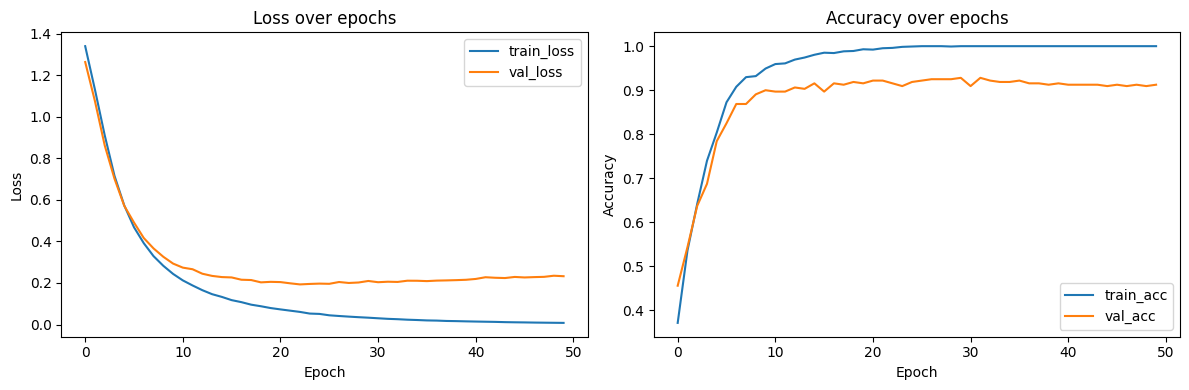

In [26]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_df["loss"], label="train_loss")
plt.plot(history_df["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over epochs")

plt.subplot(1, 2, 2)
plt.plot(history_df["accuracy"], label="train_acc")
plt.plot(history_df["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over epochs")

plt.tight_layout()
plt.show()


In [27]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.18751683831214905
Test accuracy: 0.925000011920929


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[95  5  0  0]
 [ 7 88  5  0]
 [ 0  3 90  7]
 [ 0  0  3 97]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.92      0.88      0.90       100
           2       0.92      0.90      0.91       100
           3       0.93      0.97      0.95       100

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.92      0.93      0.92       400



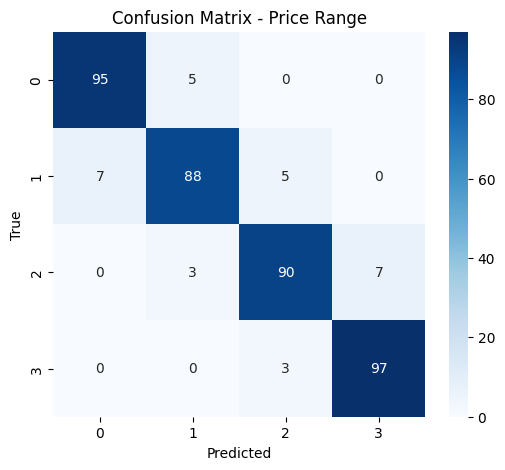

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Price Range")
plt.show()


In [30]:
model.save("smartphone_price_ann.h5")


In [31]:
feature_names = X.columns.tolist()

def predict_price_range(features_dict):
    x = np.array([features_dict[col] for col in feature_names], dtype=float).reshape(1, -1)
    x_scaled = scaler.transform(x)
    proba = model.predict(x_scaled)
    pred_class = np.argmax(proba, axis=1)[0]
    return int(pred_class), proba[0]


In [32]:
sample_phone = {
    "battery_power": 1500,
    "blue": 1,
    "clock_speed": 2.0,
    "dual_sim": 1,
    "fc": 5,
    "four_g": 1,
    "int_memory": 64,
    "m_dep": 0.5,
    "mobile_wt": 150,
    "n_cores": 4,
    "pc": 13,
    "px_height": 800,
    "px_width": 1200,
    "ram": 4096,
    "sc_h": 13,
    "sc_w": 7,
    "talk_time": 15,
    "three_g": 1,
    "touch_screen": 1,
    "wifi": 1
}

pred_class, proba = predict_price_range(sample_phone)
print("Predicted price range:", pred_class)
print("Probabilities:", proba)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted price range: 3
Probabilities: [1.4578714e-35 1.6413109e-22 1.1493211e-08 1.0000000e+00]


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
price_labels = {
    0: "Low cost",
    1: "Medium cost",
    2: "High cost",
    3: "Very high cost"
}

pred_class, proba = predict_price_range(sample_phone)
print("Predicted class:", pred_class)
print("Predicted label:", price_labels[pred_class])
print("Class probabilities:", proba)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: 3
Predicted label: Very high cost
Class probabilities: [1.4578714e-35 1.6413109e-22 1.1493211e-08 1.0000000e+00]


c:\Users\mayank goyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
